In [1]:
library("car")
library("MASS")

Loading required package: carData


In [2]:
q5 <- read.table(
  "finaltr5.dat",
  header = F,
  as.is = T,
  col.names = c('a','b','c', 'response')
)
c = ncol(q5)
r = nrow(q5)

head(q5)

q5$b = as.factor(q5$b)
q5$c = as.factor(q5$c)

a,b,c,response
0.3810751,A,D,3.2750839791569
0.5839031,A,D,6.15893683904348
0.9442381,A,D,3.41909543163286
3.0337701,A,D,8.43174642768786
1.0389591,A,D,6.67844915648159
0.9626621,A,D,5.4526186752145


In [24]:
train = q5[1:100,]
train$response = as.numeric(train$response)
test_x = q5[101:nrow(q5),][,c('a','b','c')]
test_y = read.table("finalprq5.dat", header = F, as.is = T, col.names = c('response'))

tail(train)
head(test_x)
head(test_y)

nrow(test_x)
nrow(test_y)

,a,b,c,response
95,0.5962931,C,E,-4.175984
96,0.3196521,C,E,-5.503045
97,1.0546961,C,E,-2.635743
98,0.6963731,C,E,-2.920227
99,0.1210411,C,E,-4.682489
100,0.0165321,C,E,-4.411574


,a,b,c
101,1.8035831,A,D
102,0.5769951,A,D
103,0.0723531,A,D
104,0.4535631,A,D
105,0.3435341,A,D
106,2.8714181,A,D


response
7.179578
4.850853
4.716410
5.015921
5.900529
7.250185


[1] 60

[1] 60

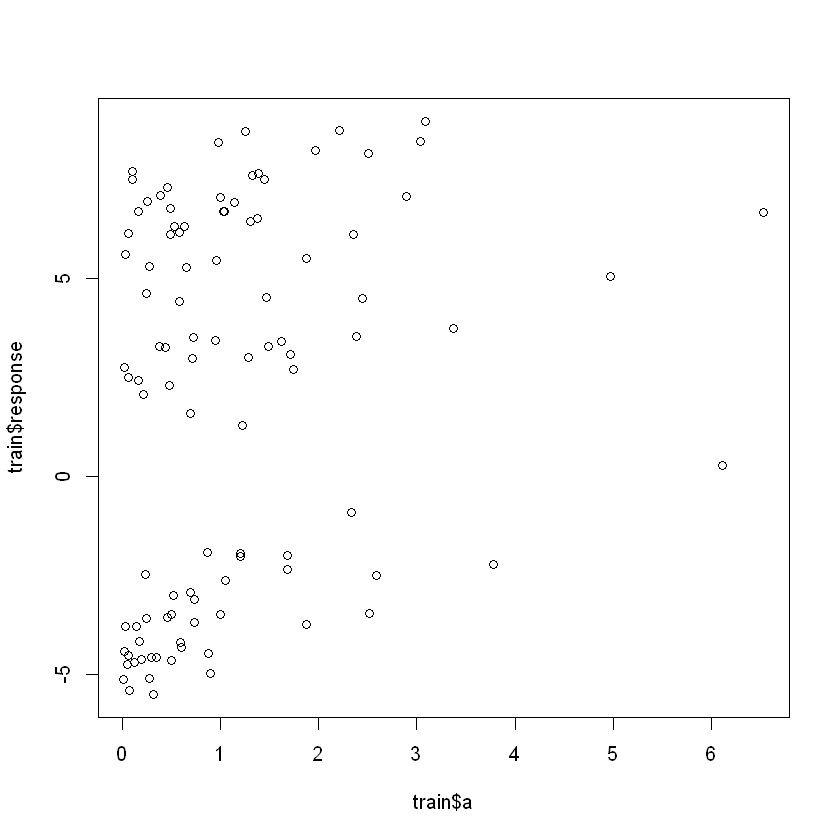

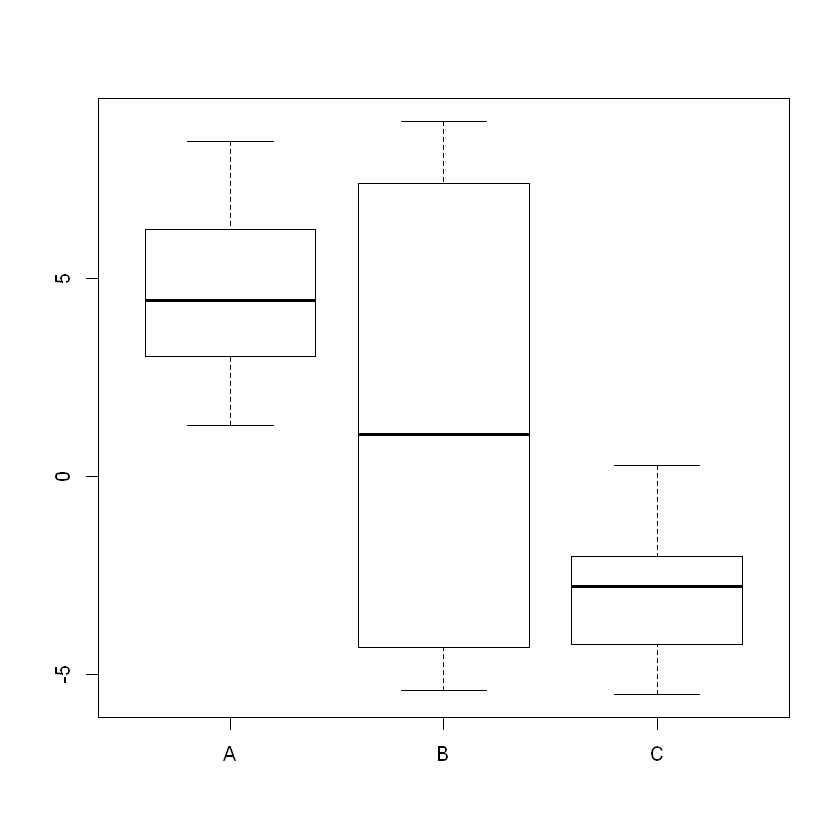

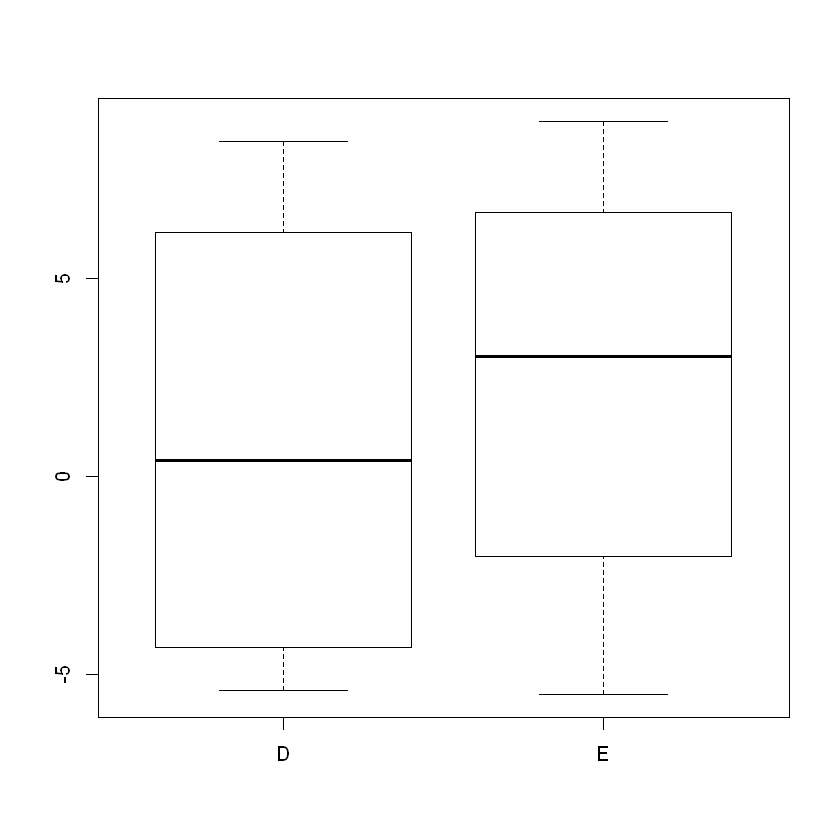

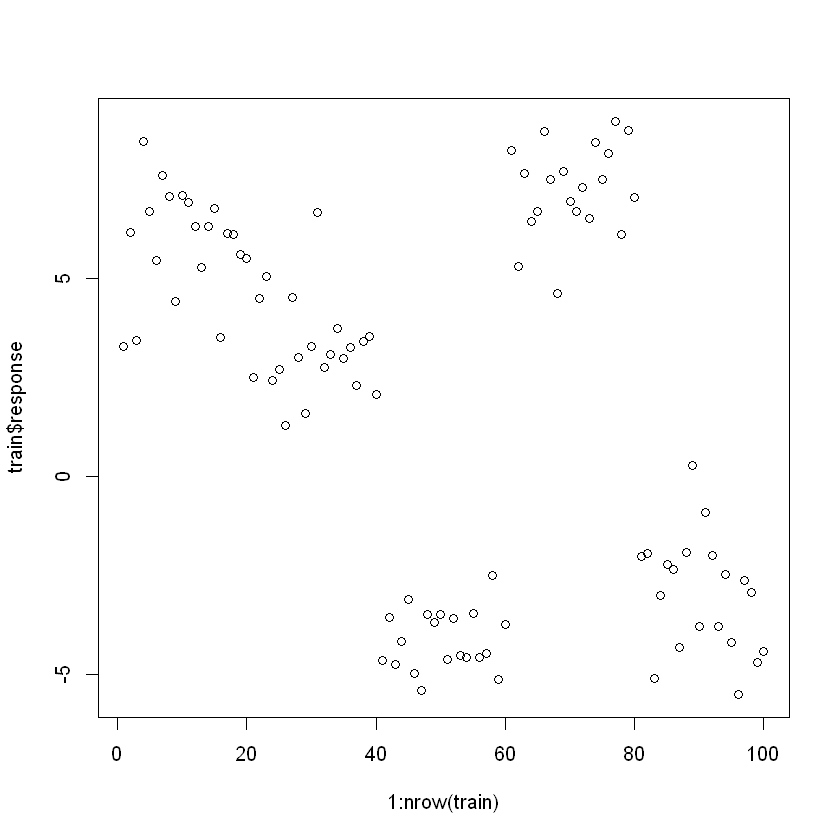

In [4]:
plot(train$a, train$response)
plot(train$b, train$response)
plot(train$c, train$response)
plot(1:nrow(train), train$response)

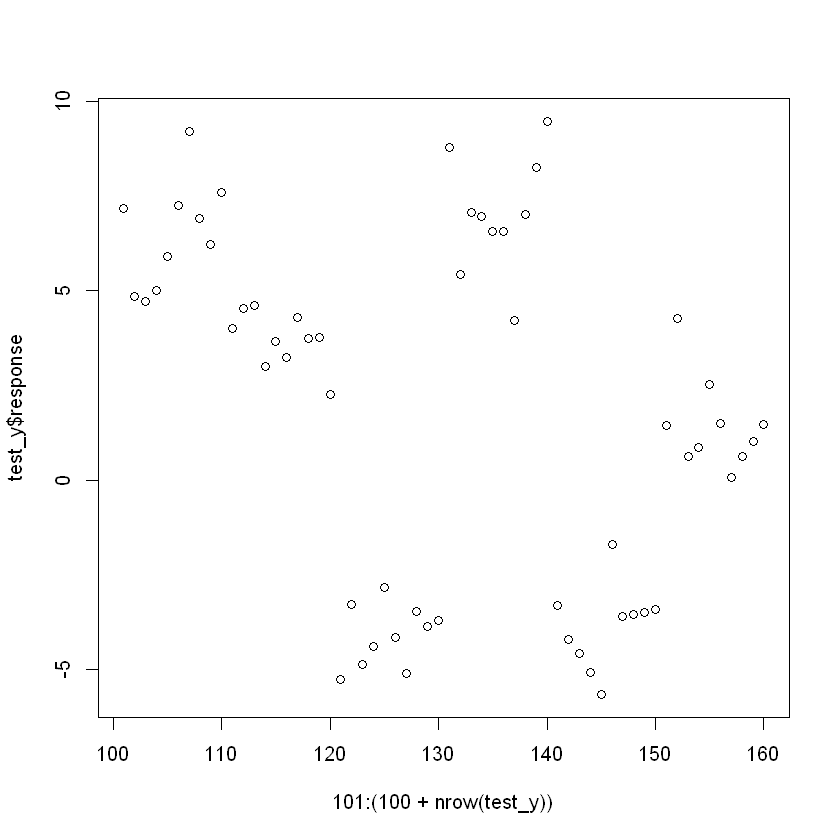

In [5]:
plot(101:(100+nrow(test_y)), test_y$response)

In [25]:
sm = lm(response ~ a*b*c, data=train)
summary(sm)
anova(sm)


Call:
lm(formula = response ~ a * b * c, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41428 -0.52275  0.04707  0.62529  1.62153 

Coefficients: (2 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1840     0.3276  15.823  < 2e-16 ***
a             0.6877     0.2461   2.794  0.00636 ** 
bB           -9.7473     0.4343 -22.446  < 2e-16 ***
bC           -6.0705     0.3977 -15.266  < 2e-16 ***
cE           -2.9818     0.4406  -6.768 1.29e-09 ***
a:bB         -0.0552     0.3701  -0.149  0.88175    
a:bC          0.1281     0.1914   0.669  0.50510    
a:cE         -0.0699     0.2768  -0.253  0.80123    
bB:cE        13.8874     0.6241  22.251  < 2e-16 ***
bC:cE             NA         NA      NA       NA    
a:bB:cE       0.2733     0.4626   0.591  0.55614    
a:bC:cE           NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,135.9078427,135.9078427,158.2106063,1.558679e-21
b,2,730.1341856,365.0670928,424.9753726,1.416392e-46
c,1,319.2948745,319.2948745,371.6918367,1.034250e-33
a:b,2,59.1567444,29.5783722,34.4322454,7.847030e-12
a:c,1,19.7062389,19.7062389,22.9400743,6.540164e-06
b:c,1,927.8432743,927.8432743,1080.1043122,6.477482e-52
a:b:c,1,0.2998403,0.2998403,0.3490447,5.561352e-01
Residuals,90,77.3128056,0.8590312,NA,NA


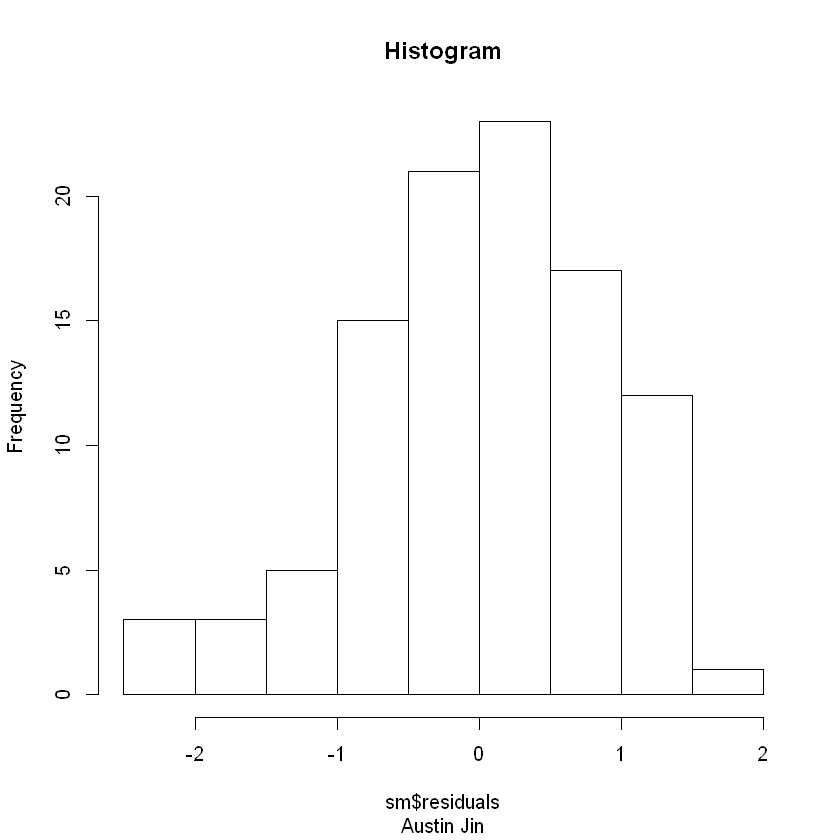

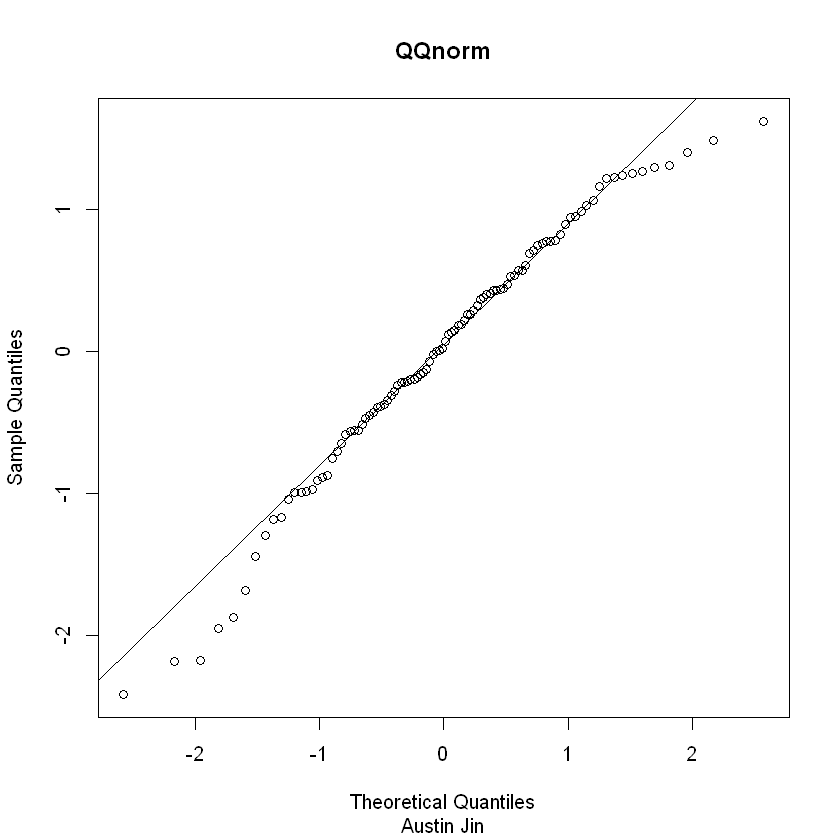

In [7]:
hist(sm$residuals, sub="Austin Jin", main="Histogram")
qqnorm(sm$residuals, sub="Austin Jin", main="QQnorm")
qqline(sm$residuals)

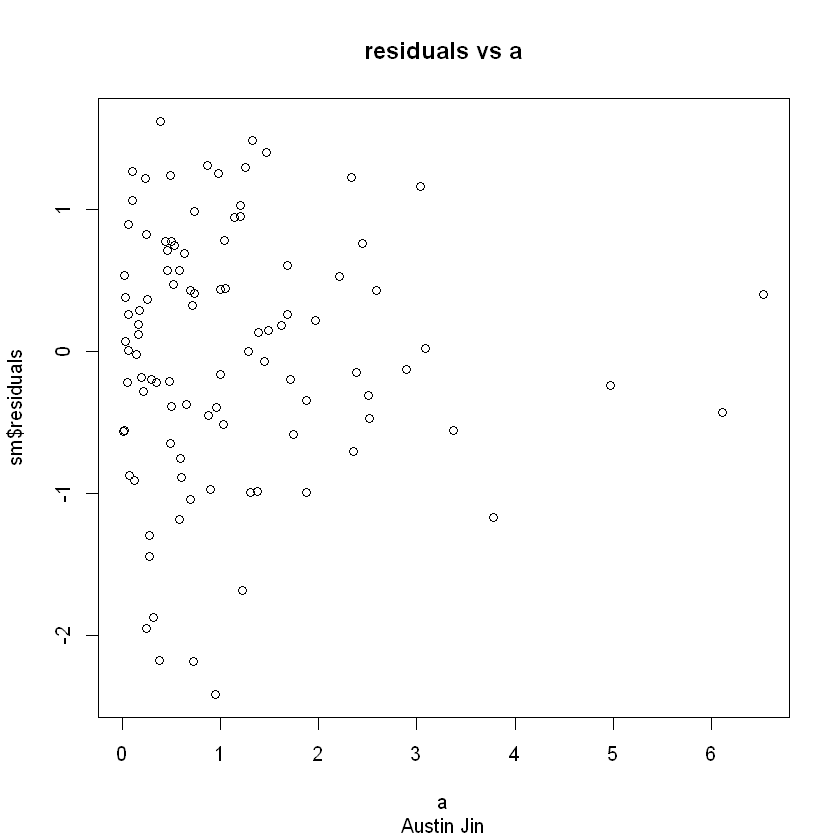

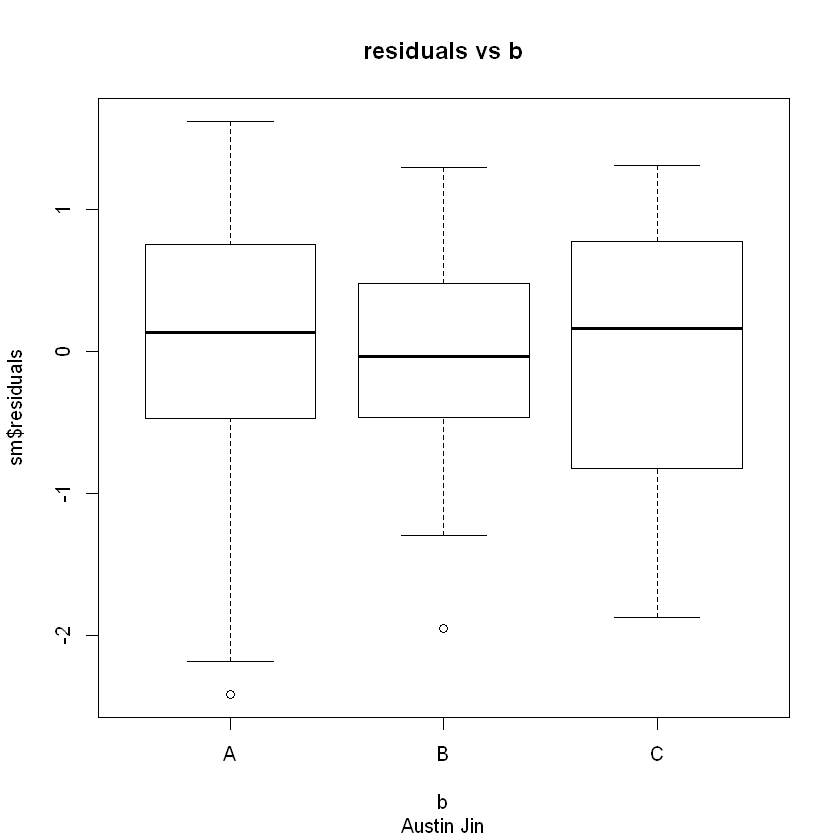

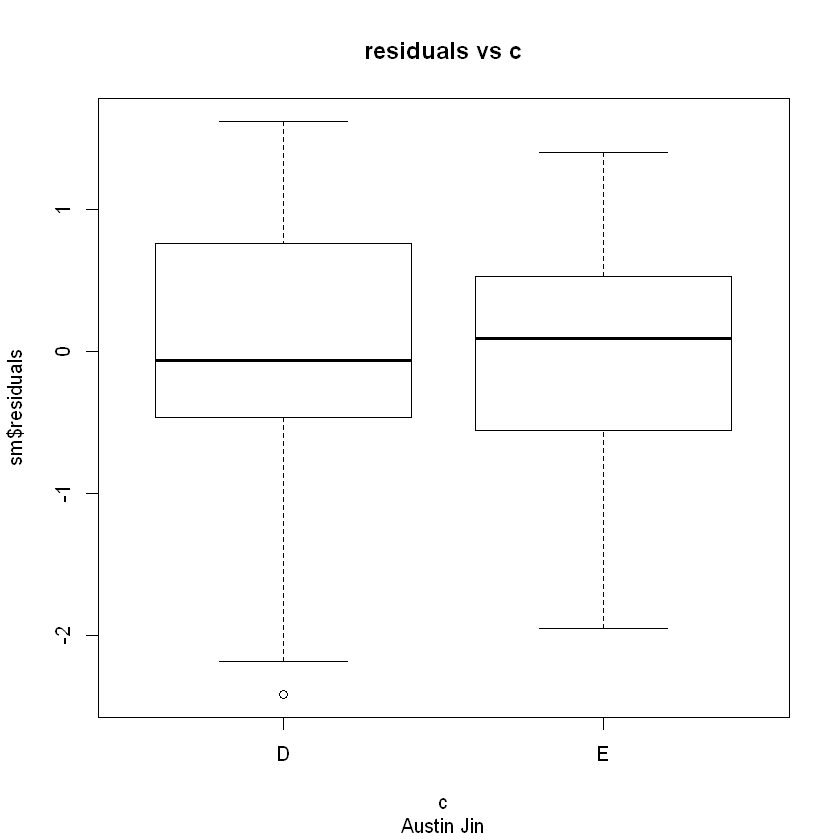

In [8]:
plot(sm$residuals~a, data=train, sub="Austin Jin", main="residuals vs a")
plot(sm$residuals~b, data=train, sub="Austin Jin", main="residuals vs b")
plot(sm$residuals~c, data=train, sub="Austin Jin", main="residuals vs c")

In [32]:
pr = predict(sm, test_x)
sum((pr - test_y)^2)
mean(((pr - test_y)^2)$response)

Warning message in predict.lm(sm, test_x):
"prediction from a rank-deficient fit may be misleading"

[1] 380.9887

[1] 6.349811

In [29]:
data.frame(predicted=pr, real=test_y$response)

,predicted,real
101,6.424367484,7.17957800
102,5.580815825,4.85085300
103,5.233762375,4.71641000
104,5.495928912,5.01592100
105,5.420259539,5.90052900
106,7.158741199,7.25018500
107,9.630250703,9.20801700
108,5.961259557,6.91729700
109,5.291449879,6.21694300
110,5.986915717,7.58316200


In [31]:
write.table(pr, file="PR5_submit.dat", col.names = F, row.names = F)